# 01. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# To ensure that the graphs are displayed within the notebook without the need to "call" them specifically
%matplotlib inline

In [3]:
# Create path to project folder
path = r'/Users/emilycurcio/Desktop/CareerFoundry/Data Immersion/Ach 6 Advanced Analytics and Dashboard Design/04-2024 World Happiness Analysis'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_combined.csv'))

In [5]:
# View data
df.head()

,country,region,happiness_rank,happiness_score,economy,family,health,freedom,gov_trust,generosity,dystopia_residual,year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


# 02. Clean Data

In [6]:
# Shape of df
df.shape

(782, 12)

In [7]:
# No missing values
df.isnull().sum()

country              0
region               0
happiness_rank       0
happiness_score      0
economy              0
family               0
health               0
freedom              0
gov_trust            0
generosity           0
dystopia_residual    0
year                 0
dtype: int64

In [8]:
# No duplicate rows
dups = df.duplicated()
dups.shape

(782,)

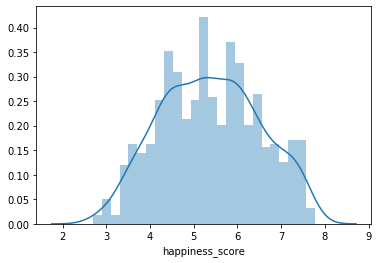

In [9]:
# Check for extreme values
# No obvious outliers
sns.distplot(df['happiness_score'], bins = 25)

In [10]:
# Check descriptive statistics
print('Mean:', df['happiness_score'].mean())
print('Median:', df['happiness_score'].median())
print('Max:', df['happiness_score'].max())
print('Min:', df['happiness_score'].min())

Mean: 5.379017902998665
Median: 5.322000000000001
Max: 7.769
Min: 2.69300007820129


# 03. Explore Relationships in Data Through Pair Plot

In [11]:
# Keep only the variables you want to use in the pair plot
sub = df[['happiness_score', 'economy', 'family', 'health', 'freedom', 'gov_trust', 'generosity']]

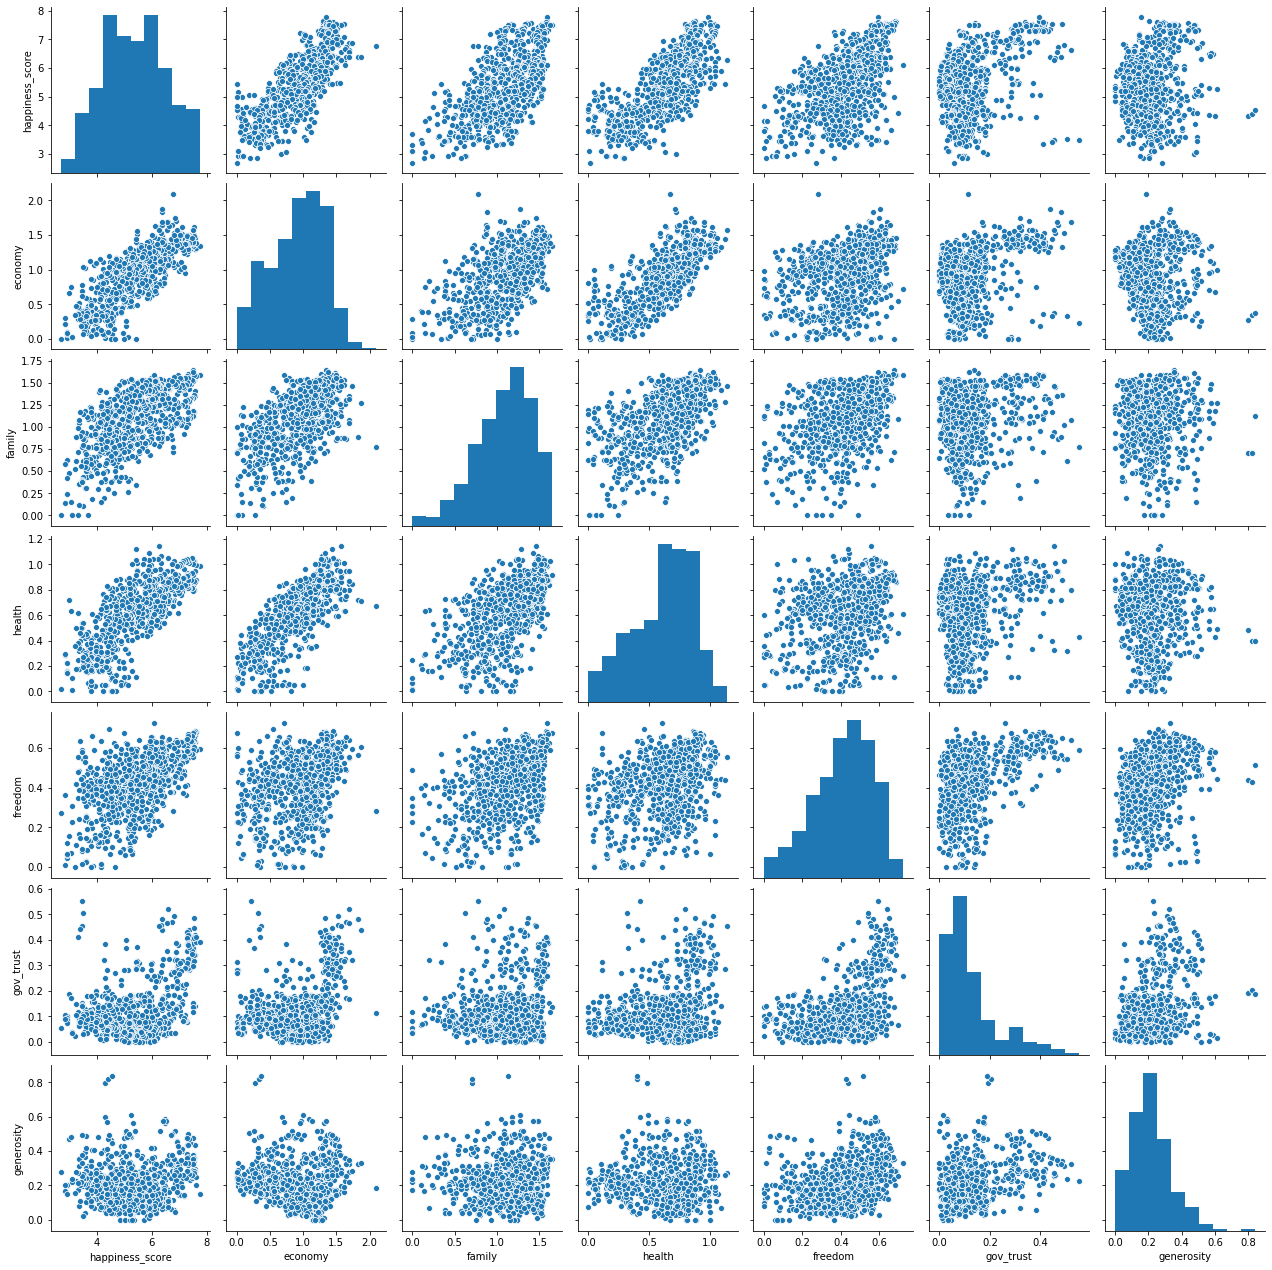

In [12]:
# Create a pair plot 
g = sns.pairplot(sub)

#### Hypothesis: 
The higher the health score, the higher the overall happiness score.

# 04. Data Prep for Regression Analysis

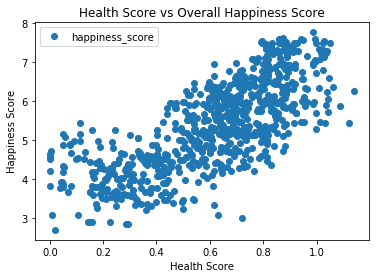

In [13]:
# Create scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'health', y = 'happiness_score', style = 'o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Health Score vs Overall Happiness Score')  
plt.xlabel('Health Score')  
plt.ylabel('Happiness Score')  
plt.show()

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['health'].values.reshape(-1, 1)
y = df['happiness_score'].values.reshape(-1, 1)

In [15]:
X

array([[0.94143   ],
       [0.94784   ],
       [0.87464   ],
       [0.88521   ],
       [0.90563   ],
       [0.88911   ],
       [0.89284   ],
       [0.91087   ],
       [0.90837   ],
       [0.93156   ],
       [0.91387   ],
       [0.86027   ],
       [0.89042   ],
       [0.81444   ],
       [0.86179   ],
       [0.69702   ],
       [0.91894   ],
       [0.89533   ],
       [0.89667   ],
       [0.80925   ],
       [0.90943   ],
       [0.76276   ],
       [0.72052   ],
       [1.02525   ],
       [0.79661   ],
       [0.89186   ],
       [0.85857   ],
       [0.79733   ],
       [0.94579   ],
       [0.78723   ],
       [0.84483   ],
       [0.8116    ],
       [0.69077   ],
       [0.7385    ],
       [0.72025   ],
       [0.95562   ],
       [0.88721   ],
       [0.8753    ],
       [0.72492   ],
       [0.6082    ],
       [0.61483   ],
       [0.67737   ],
       [0.64425   ],
       [0.59772   ],
       [0.78902   ],
       [0.99111   ],
       [0.96538   ],
       [0.790

In [16]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [17]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# 05. Regression Analysis

In [18]:
# Create a regression object
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set

In [19]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

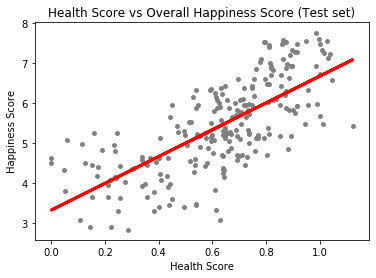

In [21]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color = 'gray', s = 15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plot_test.title('Health Score vs Overall Happiness Score (Test set)')
plot_test.xlabel('Health Score')
plot_test.ylabel('Happiness Score')
plot_test.show()

#### Observations:
By just visually looking at the graph above, the line appears to fit the data okay but there are still many points that are far from the line. Linear regression may not be the best model to fit this data.

In [22]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [23]:
# Print the model summary statistics
print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[3.35517754]]
Mean squared error:  0.6320147840397059
R2 score:  0.5190792970546503


In [24]:
# Create a df comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.072040
1,6.886,6.074671
2,6.344,5.306833
3,7.119,6.218239
4,3.781,4.608962
5,4.692,5.471857
6,4.390,4.360175
7,5.061,5.546466
8,6.929,6.076651
9,5.488,5.692986
